In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('MyFinalDataFilms1.csv')

In [3]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits,language,profit
0,19995,Avatar,Action-Adventure-Fantasy-Science Fiction,en,In the 22nd century a paraplegic Marine is dis...,771.663,20th Century Fox-Ingenious Media-Dune Entertai...,2009-12-15,237000000.0,2.920357e+09,162.0,Released,7.566,28398.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,1,2.683357e+09
1,299534,Avengers: Endgame,Adventure-Science Fiction-Action,en,After the devastating events of Avengers: Infi...,128.607,Marvel Studios,2019-04-24,356000000.0,2.797801e+09,181.0,Released,8.270,22651.0,Robert Downey Jr.-Chris Evans-Mark Ruffalo-Chr...,1,2.441801e+09
2,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,1738.087,Lightstorm Entertainment-20th Century Studios,2022-12-14,460000000.0,2.243276e+09,192.0,Released,7.733,5343.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-B...,1,1.783276e+09
3,597,Titanic,Drama-Romance,en,101-year-old Rose DeWitt Bukater tells the sto...,319.114,Paramount-20th Century Fox-Lightstorm Entertai...,1997-11-18,200000000.0,2.187464e+09,194.0,Released,7.888,22350.0,Leonardo DiCaprio-Kate Winslet-Billy Zane-Kath...,1,1.987464e+09
4,140607,Star Wars: The Force Awakens,Adventure-Action-Science Fiction-Fantasy,en,Thirty years after defeating the Galactic Empi...,57.305,Lucasfilm-Bad Robot,2015-12-15,245000000.0,2.068224e+09,136.0,Released,7.305,17755.0,Harrison Ford-Mark Hamill-Carrie Fisher-Adam D...,1,1.823224e+09


In [4]:
df = df.drop(df[df['budget'] < 500000].index)
df = df.drop(df[df['revenue'] < 500000].index)

In [5]:
df['budget'].value_counts()
df['revenue'].value_counts()


20000000.0    263
25000000.0    239
10000000.0    233
15000000.0    233
30000000.0    219
             ... 
2869666.0       1
4494427.0       1
11500005.0      1
4833490.0       1
2053648.0       1
Name: budget, Length: 1044, dtype: int64

1.000000e+07    33
2.000000e+06    29
1.200000e+07    24
2.500000e+06    22
1.100000e+07    21
                ..
5.728424e+07     1
5.731903e+07     1
5.740055e+07     1
5.746947e+07     1
2.920357e+09     1
Name: revenue, Length: 6644, dtype: int64

In [6]:
x2=np.log(df['budget'])
y2=np.log(df['revenue'])
df1 = pd.DataFrame({'budget_log': x2, 'revenue_log': y2})

<AxesSubplot:xlabel='budget_log', ylabel='revenue_log'>

Text(0.5, 1.0, 'Budget vs Revenue')

Text(0.5, 0, 'Budget ')

Text(0, 0.5, 'Revenue')

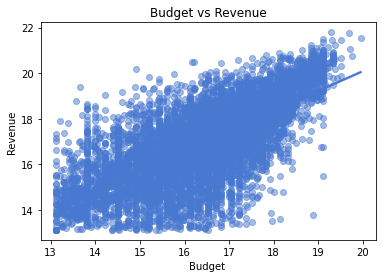

In [7]:
sns.regplot(x = 'budget_log', y = 'revenue_log', data = df1, scatter_kws={'alpha':0.5})
plt.title('Budget vs Revenue')          # Set title.
plt.xlabel("Budget ")       # Set x-axis label.
plt.ylabel('Revenue')    # Set y-axis label.

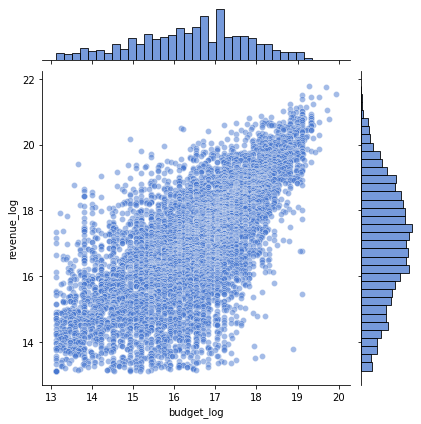

In [8]:
sns.jointplot(x = 'budget_log', y = 'revenue_log', data = df1,alpha = 0.5)

In [9]:
X = df[['original_language','budget', 'runtime','vote_count']]
y = df['revenue']
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'vote_average', 'vote_count', 'credits', 'language',
       'profit'],
      dtype='object')

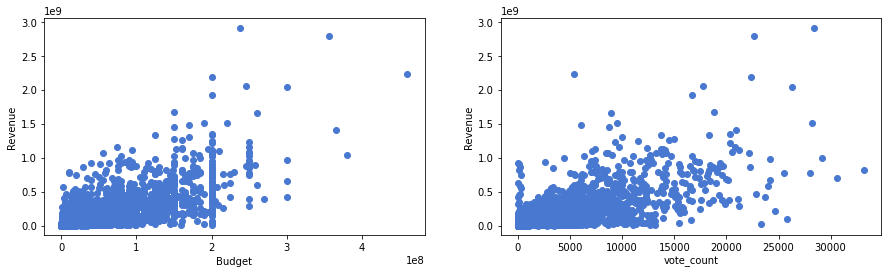

In [10]:
plt.figure(figsize = (15,4))
plt.subplot(121)
plt.scatter(X.budget,y)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.subplot(122)
plt.scatter(X.vote_count,y)
plt.xlabel("vote_count")
plt.ylabel("Revenue");

 ## Linear regresion 1.0

In [12]:
df = pd.read_csv('MyFinalDataFilms1.csv')

In [13]:
X = df[['budget', 'vote_average','popularity','runtime','vote_count']]
y = df['revenue']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [15]:
model = LinearRegression()
model

LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [18]:
model.intercept_
model.coef_

-23428345.783143967

array([ 1.87284068e+00, -1.24219184e+06,  1.39059724e+05,  1.04026934e+05,
        2.58117008e+04])

In [19]:
# prediction on X (fitted values)
y_pred = model.predict(X)
y_pred

array([ 1.26819676e+09,  1.25440377e+09,  1.22805549e+09, ...,
       -1.91256883e+07, -2.24916941e+07, -2.56338878e+07])

In [20]:
mean_squared_error(y, y_pred)
r2_score(y, y_pred)

8058298725675548.0

0.703412562368778

In [21]:
y_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_test_pred)
r2_score(y_test, y_test_pred)

8684495509162378.0

0.6928270112525851

## XGBReggresion

In [63]:
df = pd.read_csv('MyFinalDataFilms1.csv')

In [64]:
df.dtypes.sort_values()

id                        int64
language                  int64
vote_count              float64
vote_average            float64
runtime                 float64
revenue                 float64
budget                  float64
popularity              float64
profit                  float64
release_date             object
overview                 object
original_language        object
status                   object
genres                   object
title                    object
credits                  object
production_companies     object
dtype: object

In [65]:
X = df[['budget', 'vote_average','popularity','runtime','vote_count']]
y = df['revenue']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [67]:
model = XGBRegressor()

In [68]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_train_pred = model.predict(X_train)
mean_squared_error(y_train, y_train_pred)
r2_score(y_train, y_train_pred)

554986471142226.7

0.9792067353700525

In [70]:
y_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_test_pred)
r2_score(y_test, y_test_pred)

1.0063763084812296e+16

0.6440419387002647

In [71]:
list(zip(model.feature_names_in_,model.feature_importances_))

[('budget', 0.47781727),
 ('vote_average', 0.05345341),
 ('popularity', 0.0829445),
 ('runtime', 0.05568994),
 ('vote_count', 0.3300949)]

In [72]:
model.feature_names_in_

array(['budget', 'vote_average', 'popularity', 'runtime', 'vote_count'],
      dtype='<U12')